In [1]:
import os

**My Citations**

@InProceedings{maas-EtAl:2011:ACL-HLT2011,

  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  
  title     = {Learning Word Vectors for Sentiment Analysis},
  
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  
  month     = {June},
  
  year      = {2011},
  
  address   = {Portland, Oregon, USA},
  
  publisher = {Association for Computational Linguistics},
  
  pages     = {142--150},
  
  url       = {http://www.aclweb.org/anthology/P11-1015}

}

**Step 1: Processing the labels of the raw IMDB data**

In [2]:
imdb_dir = "H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\aclImdb"

In [3]:
imdb_dir

'H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\aclImdb'

In [4]:
train_dir = os.path.join(imdb_dir, 'train')

In [5]:
train_dir

'H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\aclImdb\\train'

In [6]:
labels = []
texts = []

In [7]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = "utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
type(texts)

list

In [9]:
len(texts)

25000

In [10]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [11]:
texts[24500]

'I must say, I was surprised with the quality of the movie. It was far better than I expected. Scenario and acting is quite good. The director made a good job as well. Although some scenes look a bit clumsy, it is a decent movie overall. The idea was definitely brilliant and the truth did not reveal itself till the very end. The mental hospital atmosphere was given quite good. The plot was clear, consistent and well thought. Some people may find it a bit boring though since the story line is very focused and they take their time for character and story development. Moral of the story, it is a decent movie for its genre and it is astonishingly good.'

In [12]:
type(labels)

list

In [13]:
len(labels)

25000

In [14]:
labels[0]

0

In [15]:
labels[24500]

1

**Step 2: Tokenizing the text of the raw IMDB data**

In [16]:
import keras

Using TensorFlow backend.


In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [18]:
import numpy as np

In [19]:
np.__version__

'1.16.4'

In [20]:
#Cuts reviews after 100 words
maxlen = 100

#Trains on 200 samples
training_samples = 200

#Samples for validation(Validates on 10,000 samples)
validation_samples = 10000

#consider only the top 10,000 words in dataset
max_words = 10000

In [21]:
tokenizer = Tokenizer(num_words = max_words)

In [22]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [23]:
type(sequences)

list

In [24]:
len(sequences)

25000

In [25]:
sequences[24500]

[10,
 212,
 132,
 10,
 13,
 767,
 16,
 1,
 486,
 4,
 1,
 17,
 9,
 13,
 227,
 125,
 71,
 10,
 870,
 2678,
 2,
 113,
 6,
 176,
 49,
 1,
 164,
 90,
 3,
 49,
 289,
 14,
 70,
 258,
 46,
 136,
 165,
 3,
 224,
 4078,
 9,
 6,
 3,
 539,
 17,
 441,
 1,
 323,
 13,
 404,
 526,
 2,
 1,
 879,
 119,
 21,
 2599,
 407,
 2444,
 1,
 52,
 127,
 1,
 1749,
 1548,
 838,
 13,
 345,
 176,
 49,
 1,
 111,
 13,
 787,
 4428,
 2,
 70,
 194,
 46,
 81,
 200,
 166,
 9,
 3,
 224,
 354,
 148,
 234,
 1,
 62,
 344,
 6,
 52,
 2455,
 2,
 33,
 190,
 65,
 55,
 15,
 106,
 2,
 62,
 939,
 1510,
 4,
 1,
 62,
 9,
 6,
 3,
 539,
 17,
 15,
 91,
 509,
 2,
 9,
 6,
 9027,
 49]

In [26]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [27]:
#pad sequences to the same length
data = pad_sequences(sequences, maxlen = maxlen)

In [28]:
len(data)

25000

In [29]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [30]:
indices = np.arange(data.shape[0])  #length --> 25,000

In [31]:
len(indices)

25000

In [32]:
#Splits the data into a training set and a validation set
#shuffles the data, because we're starting with data in which 
#samples are ordered (all negative first, then all positive)

np.random.shuffle(indices)

In [33]:
len(data)

25000

In [34]:
labels = labels[indices]

In [35]:
len(labels)

25000

In [36]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

**Step 3: Parsing the GloVe word-embeddings file**

In [37]:
glove_dir = 'H:\\Professional Certification\\Deep Learning 3 - Udemy - October 2020\\'
glove_dir

'H:\\Professional Certification\\Deep Learning 3 - Udemy - October 2020\\'

In [38]:
embed_vector_file = "gloVe.6B.100d.txt"  #100-dimensional embedding vectors for 400,000 words

In [39]:
embeddings_index = {}

In [40]:
type(embeddings_index)

dict

In [43]:
f = open(os.path.join(glove_dir, embed_vector_file), encoding = "utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

In [44]:
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


**Step 4: Preparing the GloVe word-embeddings matrix**

* Build an embedding matrix that can be loaded into an Embedding layer.
* It's a matrix of shape(max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in the reference word index (built during tokenization)
* index 0 isn't supposed to stand for any word or token-it's a placeholde

In [45]:
embedding_dim = 100

In [46]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [49]:
type(embedding_matrix)

numpy.ndarray

In [50]:
embedding_matrix.shape

(10000, 100)

**Step 5: Defining a model**

In [51]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [52]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


**Step 6: LOADING THE GLOVE EMBEDDINGS IN THE MODEL**
* **Loading pre-trained word embeddings into the Embedding layer**
    * Load the GloVe matrix into the Embedding layer, the first layer in the model
    * The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i

**Training and Evaluating the model**

In [55]:
#Loading pre-trained word embeddings into the Embedding layer

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 

In [56]:
#Training and Evaluating the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [58]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0707 - acc: 0.9950 - val_loss: 0.8203 - val_acc: 0.4889
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0531 - acc: 0.9950 - val_loss: 1.3369 - val_acc: 0.5041
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1120 - acc: 0.9850 - val_loss: 2.1588 - val_acc: 0.5054
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0677 - acc: 0.9750 - val_loss: 0.9785 - val_acc: 0.4947
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0410 - acc: 0.9900 - val_loss: 0.8852 - val_acc: 0.4876
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0397 - acc: 0.9900 - val_loss: 0.9008 - val_acc: 0.4894
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.0342 - acc: 0.9950 - val_loss: 2.5142 - val_acc: 0.5053
Epoch 8/10
200/200 [========

In [59]:
model.save_weights('pre_trained_glove_model.h5')

**Step 7: Plot the results**

In [60]:
import matplotlib.pyplot as plt

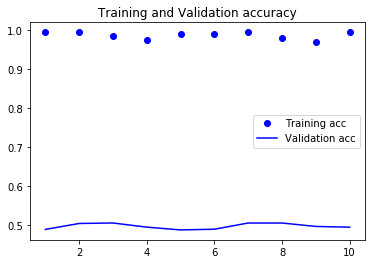

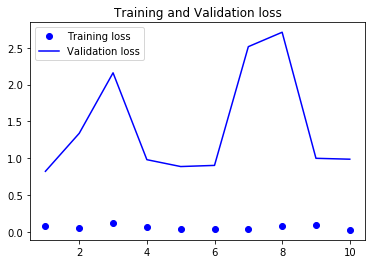

In [62]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')

plt.legend()
plt.show()

 **Step 5: Tokenizing the data of the test set(i.e test using test data)**

In [63]:
test_dir = os.path.join(imdb_dir, 'test')

In [64]:
test_dir

'H:\\Professional Certification\\Deep Learning 2 -Udemy-October 2020\\aclImdb\\test'

In [65]:
labels = []
texts = []

In [66]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = "utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [67]:
sequences = tokenizer.texts_to_sequences(texts)

In [70]:
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

**Step 6: Evaluating the model on the test set**

In [71]:
model.load_weights('pre_trained_glove_model.h5') #ensure weights file is above in step 6
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 91us/step


[0.9557340529251098, 0.5021200180053711]